In [1]:
using DrWatson;
@quickactivate "MATH361Lectures";

In [2]:
using Plots, LaTeXStrings
default(markersize=3,linewidth=1.5);

In [3]:
f(x) = sin(exp(x+1));
x0 = 0.0;
y0 = f(x0);
fp(x) = cos(exp(x+1))*exp(x+1);
yp0 = fp(x0);

In [4]:
function forward_diff(f,x,h)
    fpa = (f(x+h)-f(x))/h
    return fpa
end

forward_diff (generic function with 1 method)

In [5]:
function center_diff(f,x,h)
    fpa = (f(x+h) - f(x-h))/(2*h)
    return fpa
end

center_diff (generic function with 1 method)

In [6]:
forward_diff_h(h) = forward_diff(f,x0,h);
center_diff_h(h) = center_diff(f,x0,h);

In [7]:
h_vals = [2^(-n) for n in 1.0:12.0]

12-element Vector{Float64}:
 0.5
 0.25
 0.125
 0.0625
 0.03125
 0.015625
 0.0078125
 0.00390625
 0.001953125
 0.0009765625
 0.00048828125
 0.000244140625

In [8]:
fda = forward_diff_h.(h_vals);
cda = center_diff_h.(h_vals);

In [12]:
fda

12-element Vector{Float64}:
 -2.768575766550465
 -3.0100196002533077
 -2.7955520979327604
 -2.6451014322652555
 -2.563263103992231
 -2.521133723616341
 -2.4998167543496166
 -2.4891011707672988
 -2.483729831244858
 -2.4810408642263155
 -2.479695567537192
 -2.4790227172861705

In [13]:
cda

12-element Vector{Float64}:
 -1.9704719803862913
 -2.3924525328620603
 -2.4598193042293475
 -2.4739059023628114
 -2.4772506440351005
 -2.478075703599398
 -2.4782812720626843
 -2.478332620635271
 -2.478345455056683
 -2.478348663491829
 -2.4783494655900995
 -2.478349666114127

In [9]:
error_fda = @. abs(yp0 - fda);
error_cda = @. abs(yp0 - cda);

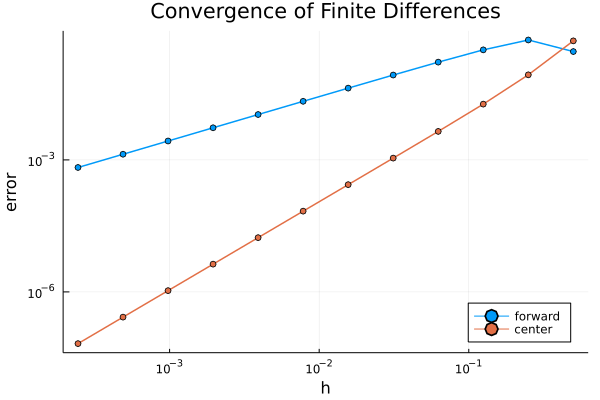

In [10]:
p = plot(h_vals,[error_fda,error_cda],m=:o,labels=["forward" "center"],
    xaxis=("h",:log10),yaxis=("error",:log10),title="Convergence of Finite Differences",legend=:bottomright)

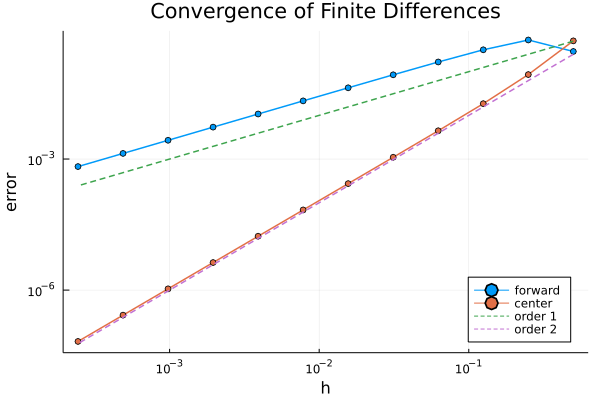

In [11]:
p = plot!(p,h_vals,[h_vals.^(1.0),h_vals.^(2.0)],labels=["order 1" "order 2"],line=:dash)